In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

import itertools

import string
from nltk import wordpunct_tokenize

from wordcloud import WordCloud


import re

In [2]:
data = pd.read_json('../data/products.json', lines=True)
data

,_id,title,category,price,avg_rating,reviews_number,questions_number,pictures,description,features,versions,bought_together,also_bought,also_viewed
0,B07DMJPV31,FIFA 19 - PlayStation 4,videogames,{'$numberDouble': '29.98'},{'$numberDouble': '4.6'},{'$numberInt': '980'},{'$numberInt': '270'},[https://images-na.ssl-images-amazon.com/image...,Descrizione prodotto\nElectronic Arts FIFA 19\...,[FIFA 19 ti permette di giocare ai più importa...,"[B07GPWY3N6, B07DM14WW1, B07GPMFLBW, B07DM88YS...",[B07HHPX4N1],"[B07HHPX4N1, B07HGBNWTY, B07894WX4H]","[B07DMCFY6P, B07DLXBGN8, B07CPG3LK8]"
1,B07NVMYB7K,Sega Megadrive Mini,videogames,{'$numberDouble': '79.99'},None,{'$numberInt': '0'},{'$numberInt': '0'},[https://images-na.ssl-images-amazon.com/image...,,"[L'iconica console di SEGA, il 55% più piccola...",[],[B07Q32Z74P],"[B07PBKX3FG, B07Q32Z74P, B07Q82PCWX]","[B07Q82PCWX, B07Q9553QS, B06XWBLSKW]"
2,B072N5968B,Yoshi`s Crafted World - Nintendo Switch,videogames,{'$numberDouble': '49.99'},{'$numberInt': '5'},{'$numberInt': '5'},{'$numberInt': '14'},[https://images-na.ssl-images-amazon.com/image...,Descrizione prodotto\nYoshi torna per un'avven...,[Unisciti a Yoshi in una nuovo platform d'azio...,[B07Q42PBYV],[B071GQXPTP],"[B07HTDXTH8, B07NSMQGPV, B07CBPK5BG]","[B07HTMYH43, B07CBPK5BG, B07MC8XD9C]"
3,B01MS894C1,Mario Kart 8 Deluxe - Nintendo Switch,videogames,{'$numberDouble': '48.99'},{'$numberDouble': '4.8'},{'$numberInt': '406'},{'$numberInt': '51'},[https://images-na.ssl-images-amazon.com/image...,Descrizione prodotto\nMario Kart\nIl multiplay...,[La versione definitiva di Mario Kart 8 sino a...,"[B07KKDZZRM, B07JJJPT6F]",[B07CB7X61L],"[B07CB7X61L, B01NCZO2LK, B01N7RIIR2]","[B072N597H5, B07DMFRJVK, B07HTMYH43]"
4,B07FLG9Z17,The Division 2 - PlayStation 4,videogames,{'$numberDouble': '45.78'},{'$numberDouble': '4.7'},{'$numberInt': '15'},{'$numberInt': '12'},[https://images-na.ssl-images-amazon.com/image...,Descrizione prodotto\nSono trascorsi sette mes...,[Clancy's the Division 2 è uno sparatutto d'az...,"[B07MFZ3WGL, B07MKPML4M, B07FDVGW1X, B07MH3BRQ...","[B07DMFZ4D6, B07DPJPWSK]","[B079JF5P7Q, B07DMFZ4D6, B07DX42FRD]","[B07BMPVG1S, B07BC376BR, B07PDVQ2BB]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20454,B07Q84HHHH,Porta Carte di Credito da Uomo | Portafoglio p...,luggage,{'$numberDouble': '15.99'},None,{'$numberInt': '0'},{'$numberInt': '0'},[https://images-na.ssl-images-amazon.com/image...,Gli accessori possono fare la differenza tra f...,[✅ DESIGN INNOVATIVO – Questo porta carte di c...,[],[],[],"[B07MVM5R4M, B07Q3R2HRT, B07Q4P9BY8]"
20455,B07PPRZVTS,Borsa Paillettes Reversibili Borsa Magia Siren...,luggage,{'$numberDouble': '11.99'},{'$numberInt': '5'},{'$numberInt': '1'},{'$numberInt': '0'},[https://images-na.ssl-images-amazon.com/image...,,[Alla Moda e Pratica: lo zaino con coulisse su...,"[B07MXY4H3F, B07MXYSTPL]",[],[],"[B07HNNB1SX, B077ZQQ2NR, B07KYJ2F75]"
20456,B07ND2K124,"Cuscino da viaggio, Efficient, Cuscini da viag...",luggage,None,{'$numberInt': '5'},{'$numberInt': '6'},{'$numberInt': '1'},[https://images-na.ssl-images-amazon.com/image...,PARTI CON EFFICIENT IL COMPAGNO DA VIAGGIO IDE...,[➤ COMODO E MULTIUSO – Efficient pillow è conf...,[],[],[],"[B07HM9YRCY, B00LB7REFK, B009416CVC]"
20457,B07NPD1KWX,Lieja Bluetooth Selfie Mobile Selfie Artifact ...,electronics,{'$numberInt': '10'},None,{'$numberInt': '0'},{'$numberInt': '0'},[https://images-na.ssl-images-amazon.com/image...,"Materiale: ABS.\nColore: bianco, rosso, blu, n...",[Soluzione wireless perfetta per scattare self...,[B07NPLBXHZ],[],[],[]


## Funzioni varie

In [49]:
def flat_list(l):
    return  [item for sublist in l for item in sublist]

#### plot dei tokens più frequenti

In [4]:
def plot_common_tokens(tokens, title, n=20):
    sentences = (list(itertools.chain(tokens)))
    flat_sentences = flat_list(sentences)
    counts = Counter(flat_sentences)
    #print(counts.most_common(30))
    common_words = [word[0] for word in counts.most_common(n)]
    common_counts = [word[1] for word in counts.most_common(n)]
    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=common_words, y=common_counts)
    plt.title(title)
    plt.show()

#### WordCloud

In [41]:
def word_Cloud(sentences):
    flat_sentences = flat_list(sentences)
    unique_string=(" ").join(flat_sentences)

    wordcloud = WordCloud(background_color="white").generate(unique_string)
    plt.figure(figsize = (10, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Titoli

In [6]:
data['token_title']=data['title'].apply(word_tokenize)

In [7]:
data['token_title']

0                            [FIFA, 19, -, PlayStation, 4]
1                                  [Sega, Megadrive, Mini]
2        [Yoshi, `, s, Crafted, World, -, Nintendo, Swi...
3            [Mario, Kart, 8, Deluxe, -, Nintendo, Switch]
4                    [The, Division, 2, -, PlayStation, 4]
                               ...                        
20454    [Porta, Carte, di, Credito, da, Uomo, |, Porta...
20455    [Borsa, Paillettes, Reversibili, Borsa, Magia,...
20456    [Cuscino, da, viaggio, ,, Efficient, ,, Cuscin...
20457    [Lieja, Bluetooth, Selfie, Mobile, Selfie, Art...
20458    [AIJEESI, Auricolari, Bluetooth, V5.0, con, Ri...
Name: token_title, Length: 20459, dtype: object

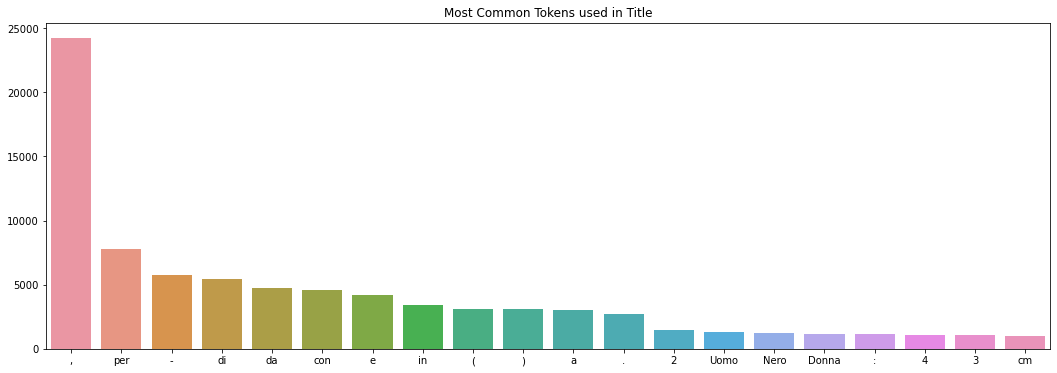

In [8]:
plot_common_tokens(data['token_title'],'Most Common Tokens used in Title')

## Categorie

In [9]:
categories = data['category'].value_counts()
print("number of categories: {}".format(len(categories)))
print("Categories:")
print(categories)

number of categories: 37
Categories:
kitchen                1784
electronics            1143
tools                  1125
books                   993
apparel                 946
sports                  887
english-books           873
jewelry                 846
hpc                     839
toys                    800
baby                    734
garden                  697
music                   672
shoes                   653
luggage                 638
beauty                  617
dvd                     616
musical-instruments     601
lighting                569
watch                   563
videogames              558
office                  512
pc                      508
grocery                 488
pet-supplies            456
appliances              418
handmade                392
industrial              381
automotive               72
luxury-beauty            30
NoStoreName              20
amazon-home              12
fiona-hardware-acc        5
amazon-ereaders           5
apple-devic

## Descrizioni

In [10]:
data['token_description']=data['description'].apply(word_tokenize)

In [11]:
data['token_description']

0        [Descrizione, prodotto, Electronic, Arts, FIFA...
1                                                       []
2        [Descrizione, prodotto, Yoshi, torna, per, un'...
3        [Descrizione, prodotto, Mario, Kart, Il, multi...
4        [Descrizione, prodotto, Sono, trascorsi, sette...
                               ...                        
20454    [Gli, accessori, possono, fare, la, differenza...
20455                                                   []
20456    [PARTI, CON, EFFICIENT, IL, COMPAGNO, DA, VIAG...
20457    [Materiale, :, ABS, ., Colore, :, bianco, ,, r...
20458    [V5.0, Cuffie, senza, fili, Bluetooth, per, iP...
Name: token_description, Length: 20459, dtype: object

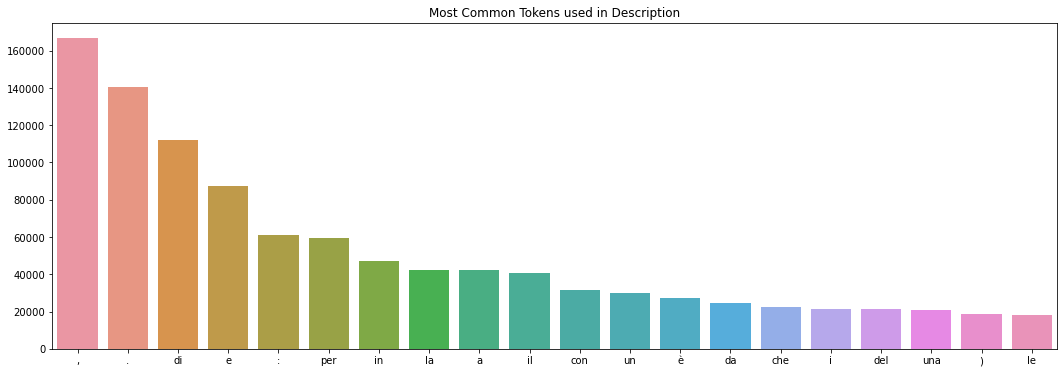

In [12]:
plot_common_tokens(data['token_description'],'Most Common Tokens used in Description')

## Eliminazione Stopwords

#### Nota: ho considerato tutto come lower case

In [13]:
stop_words=nltk.corpus.stopwords.words('italian')
stop_words

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

#### Pulizia descrizioni dalle stopwords

In [14]:
data["cleaned_description"] = data["token_description"].apply(lambda description : [word for word in description if word.lower() not in stop_words])

In [15]:
data['cleaned_description']

0        [Descrizione, prodotto, Electronic, Arts, FIFA...
1                                                       []
2        [Descrizione, prodotto, Yoshi, torna, un'avven...
3        [Descrizione, prodotto, Mario, Kart, multiplay...
4        [Descrizione, prodotto, trascorsi, sette, mesi...
                               ...                        
20454    [accessori, possono, fare, differenza, fare, f...
20455                                                   []
20456    [PARTI, EFFICIENT, COMPAGNO, VIAGGIO, IDEALE, ...
20457    [Materiale, :, ABS, ., Colore, :, bianco, ,, r...
20458    [V5.0, Cuffie, senza, fili, Bluetooth, iPhone,...
Name: cleaned_description, Length: 20459, dtype: object

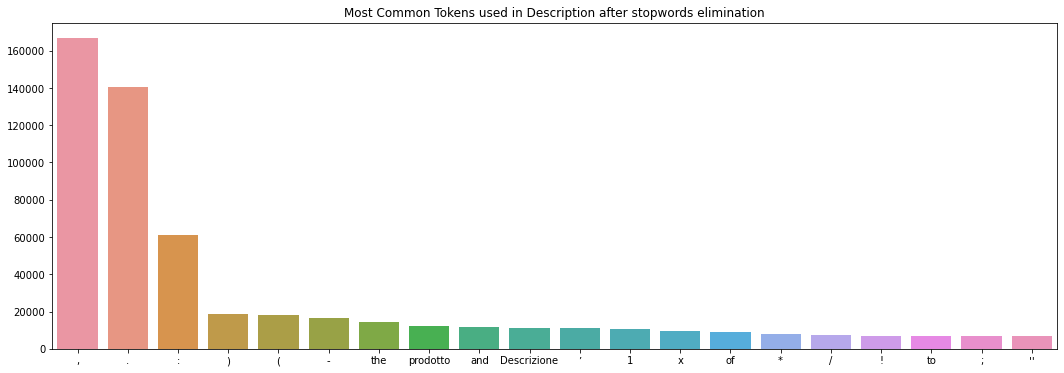

In [16]:
plot_common_tokens(data['cleaned_description'],'Most Common Tokens used in Description after stopwords elimination')

#### Pulizia titoli dalle stopwords

In [17]:
data["cleaned_title"] = data["token_title"].apply(lambda title : [word for word in title if word.lower() not in stop_words])

In [18]:
data["cleaned_title"]

0                            [FIFA, 19, -, PlayStation, 4]
1                                  [Sega, Megadrive, Mini]
2        [Yoshi, `, s, Crafted, World, -, Nintendo, Swi...
3            [Mario, Kart, 8, Deluxe, -, Nintendo, Switch]
4                    [The, Division, 2, -, PlayStation, 4]
                               ...                        
20454    [Porta, Carte, Credito, Uomo, |, Portafoglio, ...
20455    [Borsa, Paillettes, Reversibili, Borsa, Magia,...
20456    [Cuscino, viaggio, ,, Efficient, ,, Cuscini, v...
20457    [Lieja, Bluetooth, Selfie, Mobile, Selfie, Art...
20458    [AIJEESI, Auricolari, Bluetooth, V5.0, Riprodu...
Name: cleaned_title, Length: 20459, dtype: object

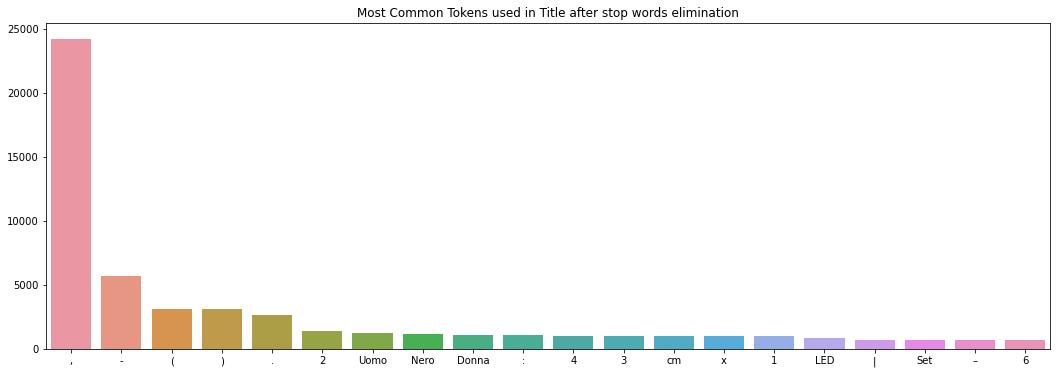

In [19]:
plot_common_tokens(data['cleaned_title'],'Most Common Tokens used in Title after stop words elimination')

## Rimozione punteggiatura

In [20]:
punctuation = string.punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


#### Pulizia Descrizioni da punteggiatura

In [21]:
data["cleaned_description"] = data["cleaned_description"].apply(lambda description : [word for word in description if word not in punctuation])

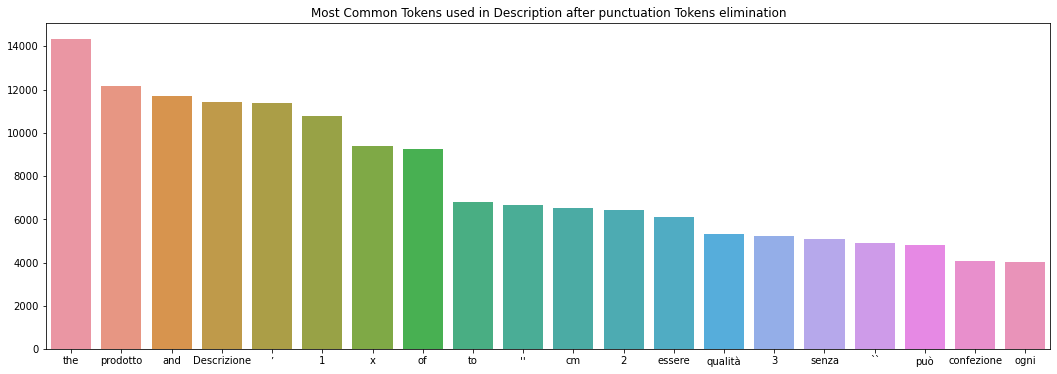

In [22]:
plot_common_tokens(data['cleaned_description'],'Most Common Tokens used in Description after punctuation Tokens elimination')

### NB: Mix tra inglese e italiano

#### Pulizia Titoli dalla punteggiatura

In [23]:
data["cleaned_title"] = data["cleaned_title"].apply(lambda title : [word for word in title if word not in punctuation])

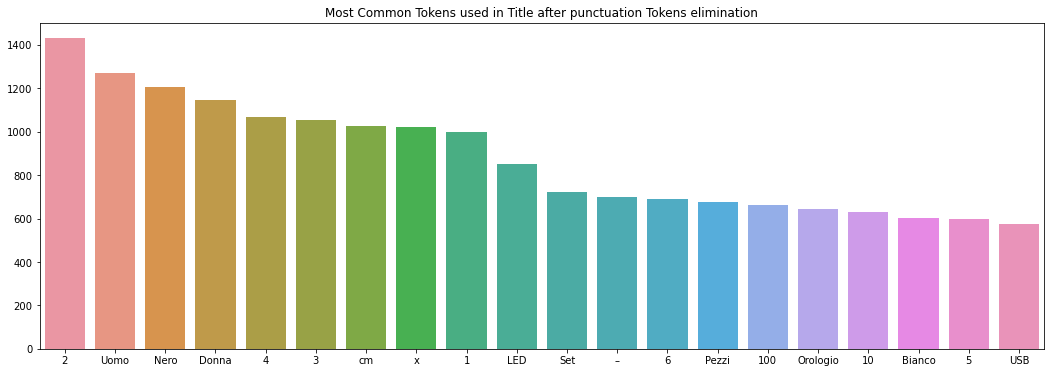

In [24]:
plot_common_tokens(data['cleaned_title'],'Most Common Tokens used in Title after punctuation Tokens elimination')

## Pulizia ulteriore

#### Eliminazione stopwords inglesi

In [25]:
from nltk.corpus import stopwords
stopwords_en =stopwords.words('english')
stopwords_en

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### Pulizia descrizioni da stopwords inglesi

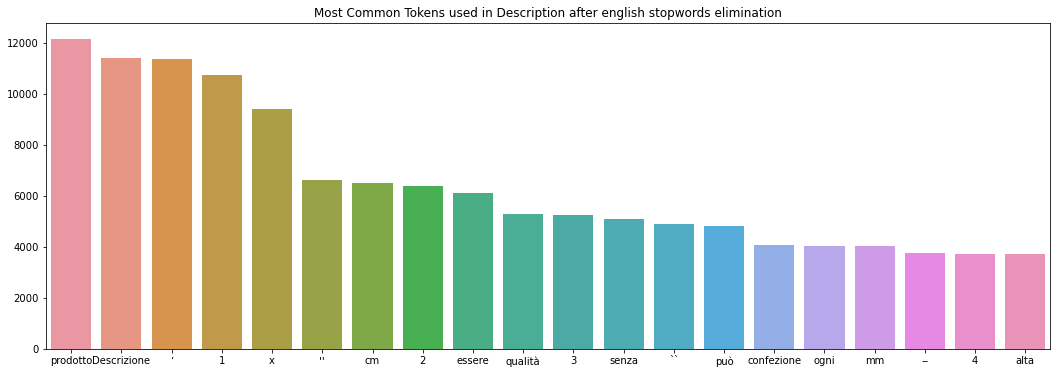

In [26]:
data["cleaned_description"] = data["cleaned_description"].apply(lambda description : [word for word in description if word.lower() not in stopwords_en])
plot_common_tokens(data['cleaned_description'],'Most Common Tokens used in Description after english stopwords elimination')

#### Pulizia titoli da stopwords inglesi

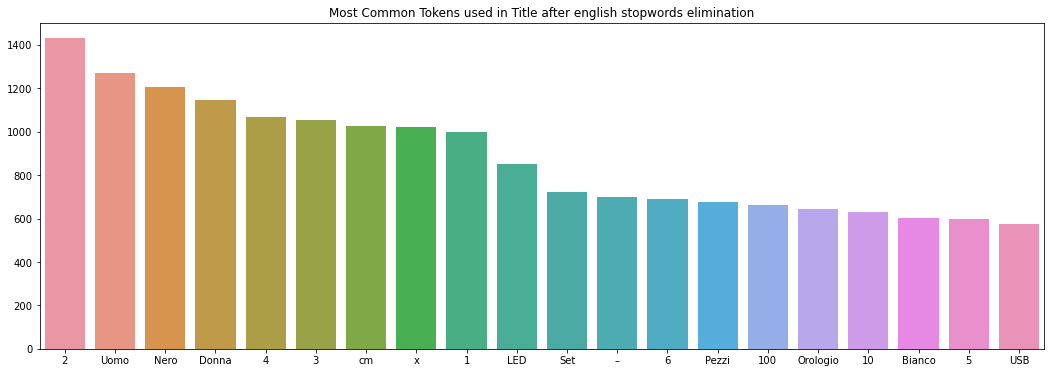

In [27]:
data["cleaned_title"] = data["cleaned_title"].apply(lambda title : [word for word in title if word.lower() not in stopwords_en])
plot_common_tokens(data['cleaned_title'],'Most Common Tokens used in Title after english stopwords elimination')

In [28]:
data[["description","cleaned_description"]]

,description,cleaned_description
0,Descrizione prodotto\nElectronic Arts FIFA 19\...,"[Descrizione, prodotto, Electronic, Arts, FIFA..."
1,,[]
2,Descrizione prodotto\nYoshi torna per un'avven...,"[Descrizione, prodotto, Yoshi, torna, un'avven..."
3,Descrizione prodotto\nMario Kart\nIl multiplay...,"[Descrizione, prodotto, Mario, Kart, multiplay..."
4,Descrizione prodotto\nSono trascorsi sette mes...,"[Descrizione, prodotto, trascorsi, sette, mesi..."
...,...,...
20454,Gli accessori possono fare la differenza tra f...,"[accessori, possono, fare, differenza, fare, f..."
20455,,[]
20456,PARTI CON EFFICIENT IL COMPAGNO DA VIAGGIO IDE...,"[PARTI, EFFICIENT, COMPAGNO, VIAGGIO, IDEALE, ..."
20457,"Materiale: ABS.\nColore: bianco, rosso, blu, n...","[Materiale, ABS, Colore, bianco, rosso, blu, n..."


#### Eliminazione numeri da Descrizioni

In [29]:
regex_numbers = r'(?:(?:\d+,?)+(?:\.?\d+)?)'

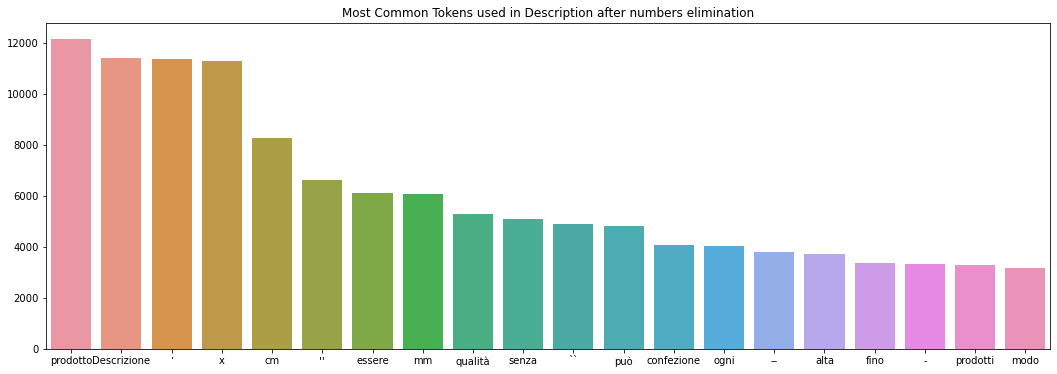

In [30]:
data["cleaned_description"] = data["cleaned_description"].apply(lambda description : [re.sub(regex_numbers,"",word) for word in description if re.sub(regex_numbers,"",word) != ""])
plot_common_tokens(data['cleaned_description'],'Most Common Tokens used in Description after numbers elimination')

#### Eliminazione numeri dai Titoli

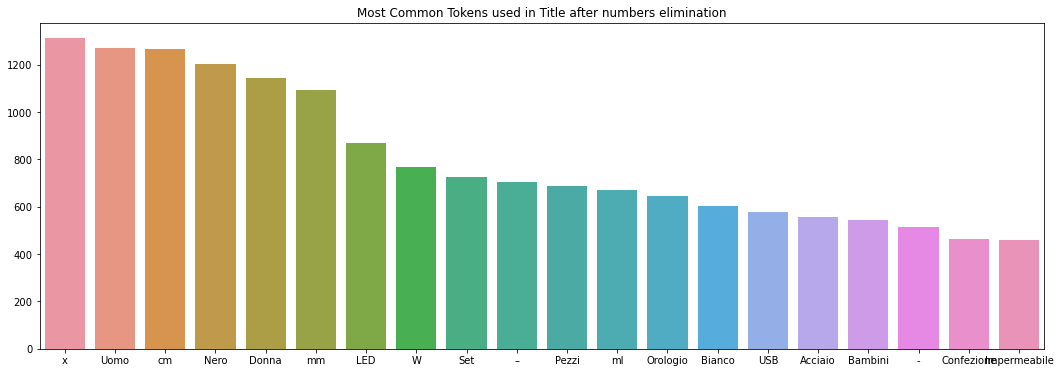

In [31]:
data["cleaned_title"] = data["cleaned_title"].apply(lambda title : [re.sub(regex_numbers,"",word) for word in title if re.sub(regex_numbers,"",word) != ""])
plot_common_tokens(data['cleaned_title'],'Most Common Tokens used in Title after numbers elimination')

#### Eliminazione caratteri singoli

In [67]:
for description in data["cleaned_description"]:
    for word in description:
        if word in '"':
            print(word)
            print(len(word))
            print("____________________________")
        
#'S
#//M
#---


In [81]:
regex_str = [
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
tokens_re


re.sub(tokens_re,"","-wo12rd-")

''

In [ ]:
data["cleaned_description"] = data["cleaned_description"].apply(lambda description : [re.sub(regex_numbers,"",word) for word in description if re.sub(regex_numbers,"",word) != ""])
plot_common_tokens(data['cleaned_description'],'Most Common Tokens used in Description after numbers elimination')

#### Descrizioni

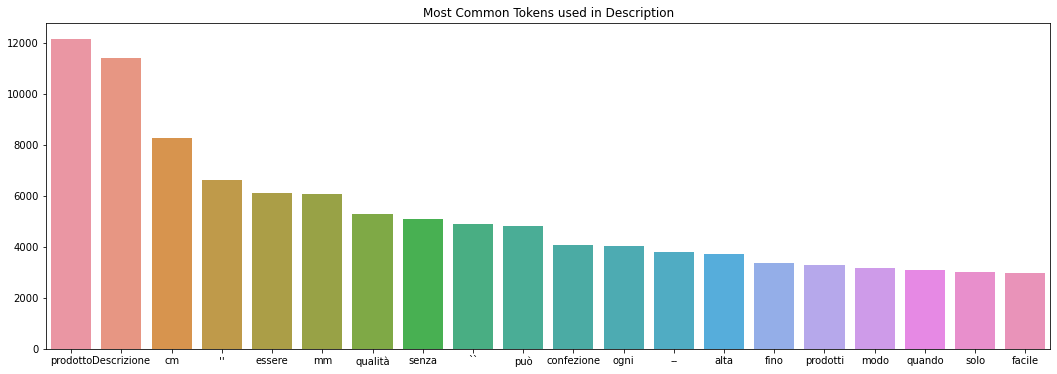

In [64]:
data["cleaned_description"] = data["cleaned_description"].apply(lambda description : [word for word in description if len(word)> 1])
plot_common_tokens(data['cleaned_description'], 'Most Common Tokens used in Description')

#### Titoli

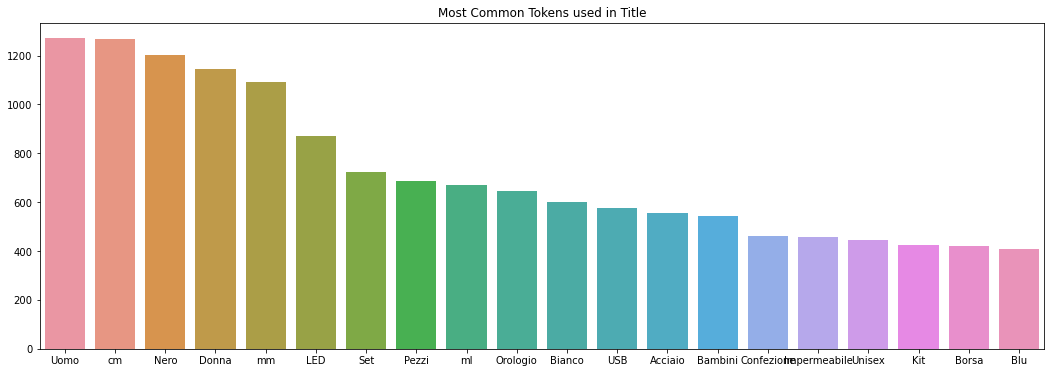

In [53]:
data["cleaned_title"] = data["cleaned_title"].apply(lambda title : [word for word in title if len(word)> 1])
plot_common_tokens(data['cleaned_title'],'Most Common Tokens used in Title')

In [32]:
### sistemare eliminazione aggiungendo: numeri, unità di misura, singoli caratteri, caratteri particolari (tipo " e -)

#### WordCloud sulla Descrizione

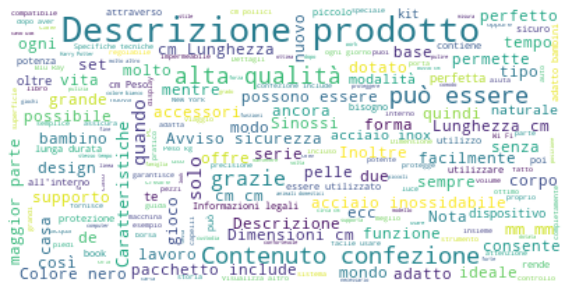

In [51]:
word_Cloud(data["cleaned_description"])

#### WordCloud sui Titoli

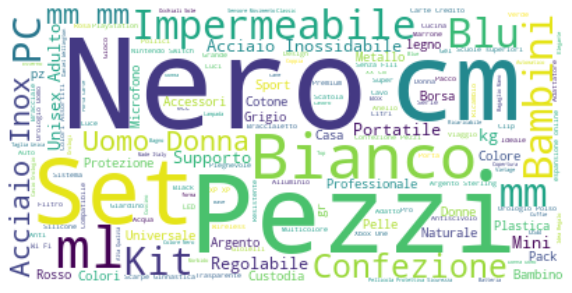

In [50]:
word_Cloud(data["cleaned_title"])